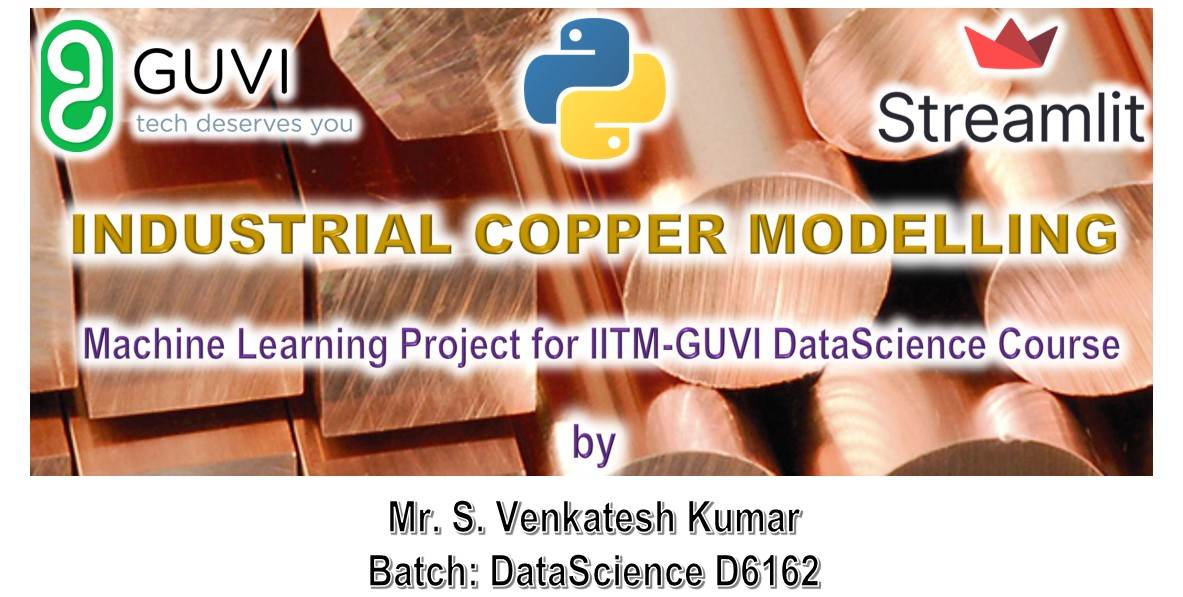

In [2]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [3]:
# Reading the csv file
cu=pd.read_csv('Copper_Set.csv')

In [4]:
# viewing the data structure
cu.head(2)

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,20210401.0,54.151139,30156308.0,28.0,Won,W,10.0,2.0,1500.0,DEQ1 S460MC,1670798778,20210701.0,854.0
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,20210401.0,768.024839,30202938.0,25.0,Won,W,41.0,0.8,1210.0,0000000000000000000000000000000000104991,1668701718,20210401.0,1047.0


## 2. Exploratory Data Analysis

In [5]:
# Viewing the shape and size of the data
print('\033[1mShape:',cu.shape[0],'Rows &',cu.shape[1],'Columns')
print('Size:',cu.size,'datapoints')

Shape: 181673 Rows & 14 Columns
Size: 2543422 datapoints


In [6]:
# Viewing what are the coulmns present in the data
cu.columns

Index(['id', 'item_date', 'quantity tons', 'customer', 'country', 'status',
       'item type', 'application', 'thickness', 'width', 'material_ref',
       'product_ref', 'delivery date', 'selling_price'],
      dtype='object')

In [7]:
# Viewing basic information about the data like total no of rows,column names with their respective datatype and non-null count
cu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181673 entries, 0 to 181672
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   id             181671 non-null  object 
 1   item_date      181672 non-null  float64
 2   quantity tons  181673 non-null  object 
 3   customer       181672 non-null  float64
 4   country        181645 non-null  float64
 5   status         181671 non-null  object 
 6   item type      181673 non-null  object 
 7   application    181649 non-null  float64
 8   thickness      181672 non-null  float64
 9   width          181673 non-null  float64
 10  material_ref   103754 non-null  object 
 11  product_ref    181673 non-null  int64  
 12  delivery date  181672 non-null  float64
 13  selling_price  181672 non-null  float64
dtypes: float64(8), int64(1), object(5)
memory usage: 19.4+ MB


### **From the above .info(), it is clear that datatype conversion is essential.** 

### Datatype conversion

In [62]:
# Create a copy of the data
copper=cu.copy()
copper.tail(2)

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
181671,7AFFD323-01D9-4E15-B80D-7D1B03498FC8,20200702.0,-2000,30200854.0,25.0,Won,W,41.0,0.85,1250.0,0000000000000000000000000000000001001149,164141591,20200701.0,601.0
181672,AD0CA853-AE3C-4B2F-9FBB-8B0B965F84BC,20200702.0,406.6865384,30200854.0,25.0,Won,W,41.0,0.71,1240.0,0000000000000000000000000000000001005439,164141591,20200701.0,607.0


In [63]:
# Viewing count of unique values in each column
cu.nunique()

id               181671
item_date           252
quantity tons    181673
customer           1169
country              17
status                9
item type             7
application          30
thickness           594
width              1386
material_ref      16563
product_ref          33
delivery date        28
selling_price      9795
dtype: int64

In [64]:
# Description about Numerical columns
cu.describe()

,item_date,customer,country,application,thickness,width,product_ref,delivery date,selling_price
count,1.816720e+05,1.816720e+05,181645.000000,181649.000000,181672.000000,181673.000000,1.816730e+05,1.816720e+05,1.816720e+05
mean,2.020459e+07,3.051221e+07,44.893022,25.615809,2.564827,1295.286724,4.739679e+08,2.020738e+07,1.918036e+03
std,4.551119e+03,2.433382e+07,24.404214,17.754175,6.572321,261.631754,7.175101e+08,2.411059e+04,3.317956e+05
min,1.995000e+07,1.245800e+04,25.000000,2.000000,0.180000,1.000000,6.117280e+05,2.019040e+07,-1.160000e+03
25%,2.020093e+07,3.019688e+07,26.000000,10.000000,0.700000,1180.000000,6.119930e+05,2.020110e+07,6.690000e+02
50%,2.020113e+07,3.020524e+07,30.000000,15.000000,1.500000,1250.000000,6.406650e+05,2.021010e+07,8.120000e+02
75%,2.021020e+07,3.028042e+07,78.000000,41.000000,3.000000,1500.000000,1.332077e+09,2.021040e+07,9.530000e+02
max,2.021040e+07,2.147484e+09,113.000000,99.000000,2500.000000,2990.000000,1.722208e+09,3.031010e+07,1.000010e+08


In [65]:
# Description about Categorical columns

cu.describe(exclude=[np.number])

,id,quantity tons,status,item type,material_ref
count,181671,181673.000000,181671,181673,103754
unique,181671,181673.000000,9,7,16563
top,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,54.151139,Won,W,DX51D+Z
freq,1,1.000000,116010,105615,922


In [66]:
# droping irrelevant columns
copper=copper.drop(columns=['id','material_ref'],axis=1)
copper

,item_date,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,delivery date,selling_price
0,20210401.0,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,1670798778,20210701.0,854.00
1,20210401.0,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,1668701718,20210401.0,1047.00
2,20210401.0,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,628377,20210101.0,644.33
3,20210401.0,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,1668701718,20210101.0,768.00
4,20210401.0,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,640665,20210301.0,577.00
...,...,...,...,...,...,...,...,...,...,...,...,...
181668,20200702.0,102.4824216,30200854.0,25.0,Won,W,41.0,0.96,1220.0,164141591,20200701.0,591.00
181669,20200702.0,208.0864686,30200854.0,25.0,Won,W,41.0,0.95,1500.0,164141591,20200701.0,589.00
181670,20200702.0,4.235593568,30200854.0,25.0,Won,W,41.0,0.71,1250.0,164141591,20200701.0,619.00
181671,20200702.0,-2000,30200854.0,25.0,Won,W,41.0,0.85,1250.0,164141591,20200701.0,601.00


In [92]:
# Check for null values
copper.isnull().sum()

item_date        0
quantity tons    0
customer         0
country          0
status           0
item type        0
application      0
thickness        0
width            0
product_ref      0
delivery date    0
selling_price    0
dtype: int64

In [91]:
copper.dropna(inplace=True)

In [93]:
copper.reset_index(drop=True)

,item_date,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,delivery date,selling_price
0,2021-04-01,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,1670798778,20210701.0,854.00
1,2021-04-01,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,1668701718,20210401.0,1047.00
2,2021-04-01,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,628377,20210101.0,644.33
3,2021-04-01,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,1668701718,20210101.0,768.00
4,2021-04-01,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,640665,20210301.0,577.00
...,...,...,...,...,...,...,...,...,...,...,...,...
181631,2020-07-02,102.4824216,30200854.0,25.0,Won,W,41.0,0.96,1220.0,164141591,20200701.0,591.00
181632,2020-07-02,208.0864686,30200854.0,25.0,Won,W,41.0,0.95,1500.0,164141591,20200701.0,589.00
181633,2020-07-02,4.235593568,30200854.0,25.0,Won,W,41.0,0.71,1250.0,164141591,20200701.0,619.00
181634,2020-07-02,-2000,30200854.0,25.0,Won,W,41.0,0.85,1250.0,164141591,20200701.0,601.00


In [77]:
copper.isnull().sum()

item_date        0
quantity tons    0
customer         0
country          0
status           0
item type        0
application      0
thickness        0
width            0
product_ref      0
delivery date    0
selling_price    0
dtype: int64

In [17]:
# Check for duplicated values
copper.duplicated().sum()

0

In [81]:
copper.loc[53]

item_date        2021-04-01
quantity tons      30.89995
customer         30336279.0
country                78.0
status                  Won
item type                 S
application            59.0
thickness               3.0
width                 800.0
product_ref          640665
delivery date    20210501.0
selling_price         846.0
Name: 53, dtype: object

In [72]:
copper.drop(52,inplace=True)

In [83]:
copper.reset_index(drop=True)

,item_date,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,delivery date,selling_price
0,2021-04-01,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,1670798778,20210701.0,854.00
1,2021-04-01,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,1668701718,20210401.0,1047.00
2,2021-04-01,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,628377,20210101.0,644.33
3,2021-04-01,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,1668701718,20210101.0,768.00
4,2021-04-01,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,640665,20210301.0,577.00
...,...,...,...,...,...,...,...,...,...,...,...,...
181632,2020-07-02,102.4824216,30200854.0,25.0,Won,W,41.0,0.96,1220.0,164141591,20200701.0,591.00
181633,2020-07-02,208.0864686,30200854.0,25.0,Won,W,41.0,0.95,1500.0,164141591,20200701.0,589.00
181634,2020-07-02,4.235593568,30200854.0,25.0,Won,W,41.0,0.71,1250.0,164141591,20200701.0,619.00
181635,2020-07-02,-2000,30200854.0,25.0,Won,W,41.0,0.85,1250.0,164141591,20200701.0,601.00


In [85]:
copper['item_date']=pd.to_datetime(cu1['item_date'],format='%Y%m%d',errors='coerce')

In [100]:
copper['item_date']=pd.to_datetime(copper['item_date'])

In [101]:
copper.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 181636 entries, 0 to 181672
Data columns (total 12 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   item_date      181636 non-null  datetime64[ns]
 1   quantity tons  181636 non-null  object        
 2   customer       181636 non-null  float64       
 3   country        181636 non-null  float64       
 4   status         181636 non-null  object        
 5   item type      181636 non-null  object        
 6   application    181636 non-null  float64       
 7   thickness      181636 non-null  float64       
 8   width          181636 non-null  float64       
 9   product_ref    181636 non-null  int64         
 10  delivery date  181636 non-null  float64       
 11  selling_price  181636 non-null  float64       
dtypes: datetime64[ns](1), float64(7), int64(1), object(3)
memory usage: 18.0+ MB


In [124]:
# Datatype conversion
#copper['item_date'] = pd.to_datetime(copper['item_date'], format='%Y-%m-%d', errors='coerce').dt.date
copper['quantity tons'] = pd.to_numeric(copper['quantity tons'], errors='coerce')
copper['customer'] = pd.to_numeric(copper['customer'], errors='coerce')
copper['country'] = pd.to_numeric(copper['country'], errors='coerce')
copper['application'] = pd.to_numeric(copper['application'], errors='coerce')
copper['thickness'] = pd.to_numeric(copper['thickness'], errors='coerce')
copper['width'] = pd.to_numeric(copper['width'], errors='coerce')
copper['product_ref'] = pd.to_numeric(copper['product_ref'], errors='coerce')
#copper['delivery date'] = pd.to_datetime(copper['delivery date'], format='%Y-%m-%d', errors='coerce').dt.date
copper['selling_price'] = pd.to_numeric(copper['selling_price'], errors='coerce')

In [112]:
#copper['item_date'] = pd.to_datetime(copper['item_date'], format='%Y-%m-%d')
copper['delivery date'] = pd.to_datetime(copper['delivery date'], format='%Y%m%d',errors='coerce')


In [113]:
copper.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 181636 entries, 0 to 181672
Data columns (total 12 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   item_date      181636 non-null  datetime64[ns]
 1   quantity tons  181636 non-null  object        
 2   customer       181636 non-null  float64       
 3   country        181636 non-null  float64       
 4   status         181636 non-null  object        
 5   item type      181636 non-null  object        
 6   application    181636 non-null  float64       
 7   thickness      181636 non-null  float64       
 8   width          181636 non-null  float64       
 9   product_ref    181636 non-null  int64         
 10  delivery date  181634 non-null  datetime64[ns]
 11  selling_price  181636 non-null  float64       
dtypes: datetime64[ns](2), float64(6), int64(1), object(3)
memory usage: 18.0+ MB


## Dealing with Null Values

In [118]:
copper=copper.dropna(subset=['item_date','delivery date','quantity tons'])

In [119]:
copper['delivery date'].isnull().sum()

0

In [109]:
copper['item_date'].isnull().sum()

0

In [125]:
copper.isnull().sum()

item_date        0
quantity tons    1
customer         0
country          0
status           0
item type        0
application      0
thickness        0
width            0
product_ref      0
delivery date    0
selling_price    0
dtype: int64

In [126]:
copper

,item_date,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,delivery date,selling_price
0,2021-04-01,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,1670798778,2021-07-01,854.00
1,2021-04-01,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,1668701718,2021-04-01,1047.00
2,2021-04-01,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,628377,2021-01-01,644.33
3,2021-04-01,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,1668701718,2021-01-01,768.00
4,2021-04-01,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,640665,2021-03-01,577.00
...,...,...,...,...,...,...,...,...,...,...,...,...
181668,2020-07-02,102.482422,30200854.0,25.0,Won,W,41.0,0.96,1220.0,164141591,2020-07-01,591.00
181669,2020-07-02,208.086469,30200854.0,25.0,Won,W,41.0,0.95,1500.0,164141591,2020-07-01,589.00
181670,2020-07-02,4.235594,30200854.0,25.0,Won,W,41.0,0.71,1250.0,164141591,2020-07-01,619.00
181671,2020-07-02,-2000.000000,30200854.0,25.0,Won,W,41.0,0.85,1250.0,164141591,2020-07-01,601.00


In [127]:
copper.describe()

,quantity tons,customer,country,application,thickness,width,product_ref,selling_price
count,1.816260e+05,1.816270e+05,181627.000000,181627.000000,181627.000000,181627.000000,1.816270e+05,1.816270e+05
mean,5.876391e+03,3.023251e+07,44.893584,25.615778,2.550446,1295.264426,4.740122e+08,1.918437e+03
std,2.349379e+06,1.005635e+05,24.404430,17.753888,2.976478,261.649437,7.175285e+08,3.318367e+05
min,-2.000000e+03,1.245800e+04,25.000000,2.000000,0.180000,1.000000,6.117280e+05,1.000000e-01
25%,1.096793e+01,3.019688e+07,26.000000,10.000000,0.700000,1179.000000,6.119930e+05,6.690000e+02
50%,3.036242e+01,3.020524e+07,30.000000,15.000000,1.500000,1250.000000,6.406650e+05,8.120000e+02
75%,6.716141e+01,3.028042e+07,78.000000,41.000000,3.000000,1500.000000,1.332077e+09,9.530000e+02
max,1.000000e+09,3.040818e+07,113.000000,99.000000,400.000000,2990.000000,1.722208e+09,1.000010e+08


In [121]:
copper['delivery date'].unique()

array(['2021-07-01T00:00:00.000000000', '2021-04-01T00:00:00.000000000',
       '2021-01-01T00:00:00.000000000', '2021-03-01T00:00:00.000000000',
       '2021-06-01T00:00:00.000000000', '2021-05-01T00:00:00.000000000',
       '2021-08-01T00:00:00.000000000', '2021-09-01T00:00:00.000000000',
       '2021-10-01T00:00:00.000000000', '2021-11-01T00:00:00.000000000',
       '2022-01-01T00:00:00.000000000', '2020-07-01T00:00:00.000000000',
       '2020-10-01T00:00:00.000000000', '2020-01-01T00:00:00.000000000',
       '2021-02-01T00:00:00.000000000', '2021-12-01T00:00:00.000000000',
       '2019-07-01T00:00:00.000000000', '2020-08-01T00:00:00.000000000',
       '2020-11-01T00:00:00.000000000', '2020-12-01T00:00:00.000000000',
       '2019-04-01T00:00:00.000000000', '2020-06-01T00:00:00.000000000',
       '2020-04-01T00:00:00.000000000', '2020-09-01T00:00:00.000000000',
       '2020-05-01T00:00:00.000000000', '2019-10-01T00:00:00.000000000'],
      dtype='datetime64[ns]')

In [128]:
copper=copper[copper['quantity tons']>0]

In [129]:
copper=copper[copper['selling_price']>0]

In [130]:
copper['quantity tons']=copper['quantity tons'].round(2)

In [131]:
copper.reset_index(drop=True)

,item_date,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,delivery date,selling_price
0,2021-04-01,54.15,30156308.0,28.0,Won,W,10.0,2.00,1500.0,1670798778,2021-07-01,854.00
1,2021-04-01,768.02,30202938.0,25.0,Won,W,41.0,0.80,1210.0,1668701718,2021-04-01,1047.00
2,2021-04-01,386.13,30153963.0,30.0,Won,WI,28.0,0.38,952.0,628377,2021-01-01,644.33
3,2021-04-01,202.41,30349574.0,32.0,Won,S,59.0,2.30,1317.0,1668701718,2021-01-01,768.00
4,2021-04-01,785.53,30211560.0,28.0,Won,W,10.0,4.00,2000.0,640665,2021-03-01,577.00
...,...,...,...,...,...,...,...,...,...,...,...,...
181617,2020-07-02,106.78,30200854.0,25.0,Won,W,41.0,0.96,1240.0,164141591,2020-07-01,602.00
181618,2020-07-02,102.48,30200854.0,25.0,Won,W,41.0,0.96,1220.0,164141591,2020-07-01,591.00
181619,2020-07-02,208.09,30200854.0,25.0,Won,W,41.0,0.95,1500.0,164141591,2020-07-01,589.00
181620,2020-07-02,4.24,30200854.0,25.0,Won,W,41.0,0.71,1250.0,164141591,2020-07-01,619.00


# Data Visualisation
## Univariate analysis

In [132]:
print('Total no. of countries in the data:',copper['country'].nunique())
copper['country'].value_counts()

Total no. of countries in the data: 17


78.0     32082
26.0     27513
25.0     23357
27.0     21506
32.0     18657
28.0     15822
84.0     12776
77.0      9713
30.0      8701
39.0      3730
79.0      2742
38.0      1712
40.0      1683
80.0       817
113.0      714
89.0        92
107.0        5
Name: country, dtype: int64

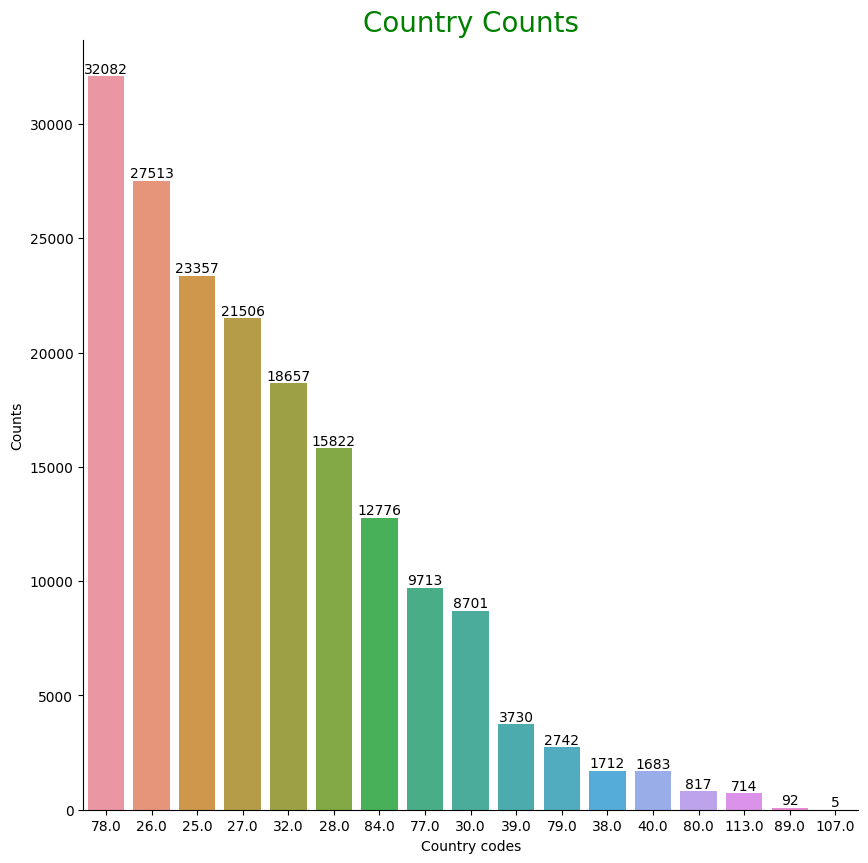

In [133]:
plt.figure(figsize=(10,10))
country=sns.countplot(x='country',data=copper,order=copper['country'].value_counts(ascending=False).index)
country.bar_label(country.containers[0],fontsize=10)

plt.title('Country Counts',fontsize=20,color='green')
plt.xlabel('Country codes',fontsize=10)
plt.ylabel('Counts',fontsize=10)
sns.despine()

In [134]:
copper['product_ref'].nunique()

33

In [135]:
copper['product_ref'].value_counts()

611993        45719
164141591     28778
640665        27373
1670798778    18913
628377        18572
1668701718    15282
640405         9692
1671863738     5161
1332077137     4559
1693867550     1825
1668701376     1216
1671876026      823
628117          775
164337175       653
1668701698      374
1693867563      293
1282007633      281
1721130331      256
1665572374      202
628112          177
611728          148
1690738206      147
1722207579      125
640400           83
1668701725       56
164336407        49
611733           45
1690738219       19
1665584320       12
1665572032       10
1665584642        2
929423819         1
1665584662        1
Name: product_ref, dtype: int64

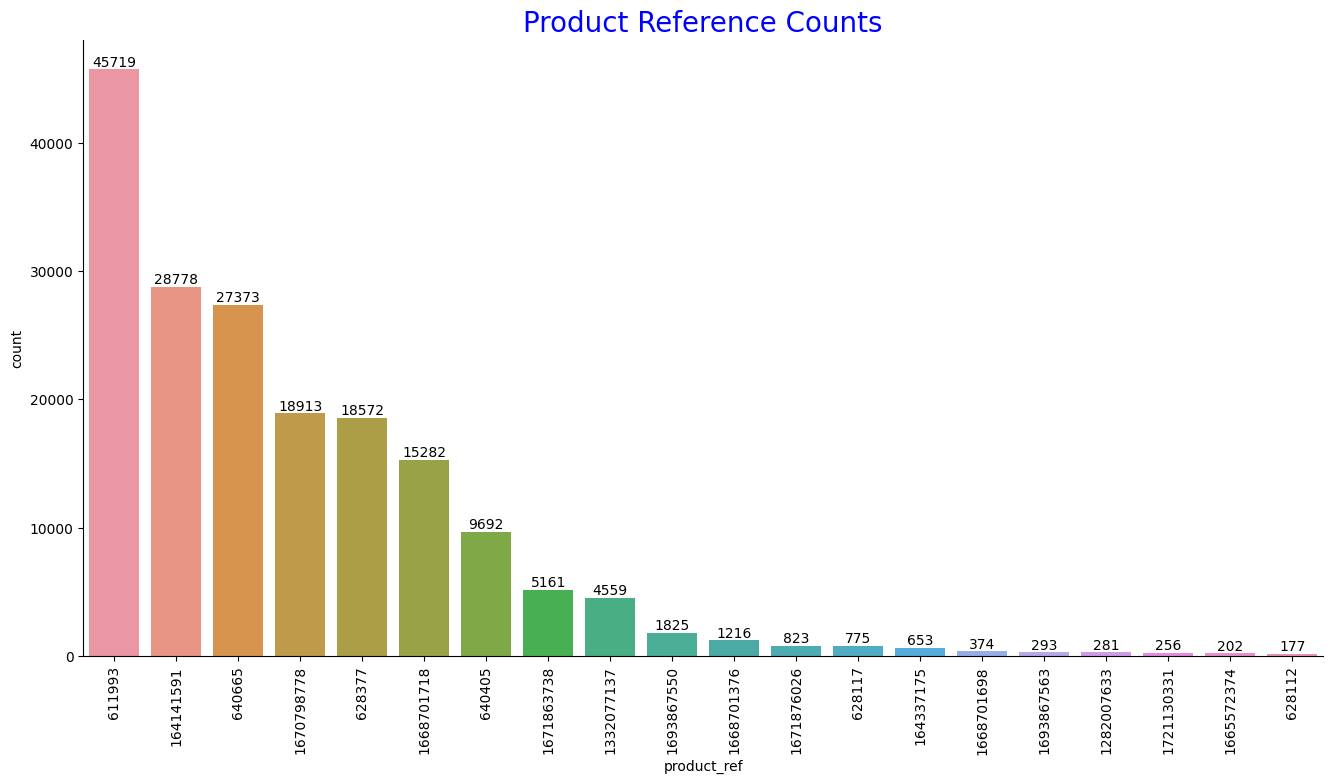

In [136]:
plt.figure(figsize=(16,8))
prodref=sns.countplot(x='product_ref',data=copper,order=copper['product_ref'].value_counts(ascending=False).index[:20])
prodref.bar_label(prodref.containers[0],size=10)
plt.xticks(rotation=90)
plt.title('Product Reference Counts',fontsize=20,color='blue')
sns.despine()

In [137]:
copper.head(1)

,item_date,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,delivery date,selling_price
0,2021-04-01,54.15,30156308.0,28.0,Won,W,10.0,2.0,1500.0,1670798778,2021-07-01,854.0


In [138]:
copper['item_date'].dt.year.value_counts()

2020    110736
2021     70886
Name: item_date, dtype: int64

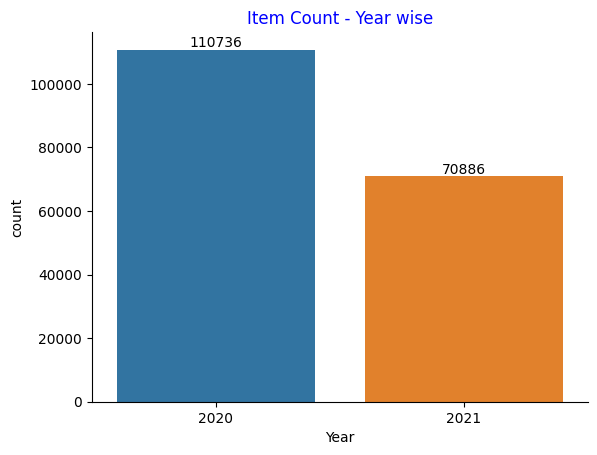

In [139]:
year_item_date=sns.countplot(x=copper['item_date'].dt.year)
year_item_date.bar_label(year_item_date.containers[0])
plt.title('Item Count - Year wise',color='blue')
plt.xlabel('Year')
sns.despine()

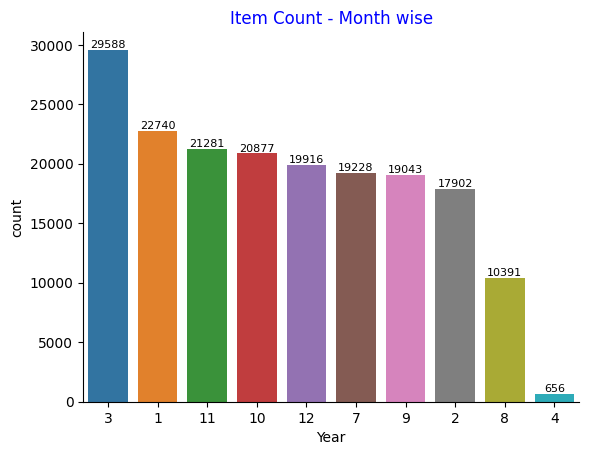

In [140]:
year_item_date=sns.countplot(x=copper['item_date'].dt.month,order=copper['item_date'].dt.month.value_counts(ascending=False).index)
year_item_date.bar_label(year_item_date.containers[0],fontsize=8)
plt.title('Item Count - Month wise',color='blue')
plt.xlabel('Year')
sns.despine()

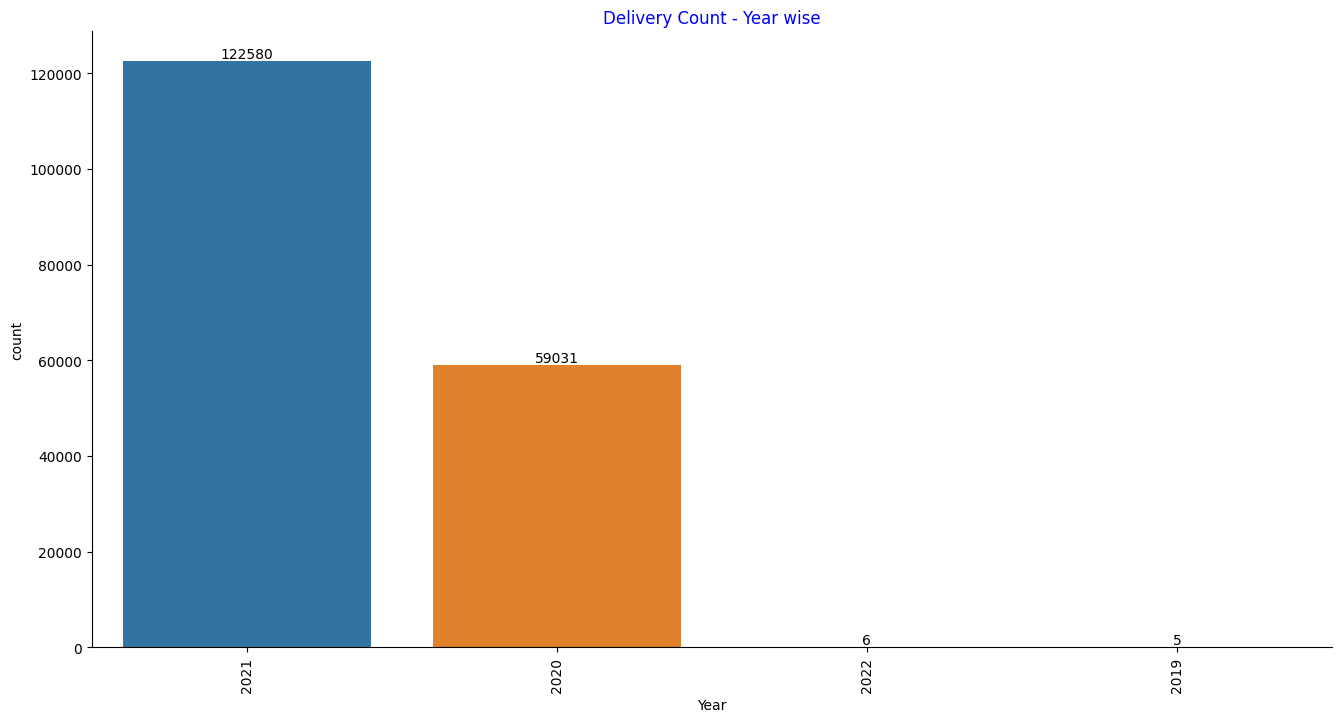

In [141]:
plt.figure(figsize=(16,8))
year_deli_date=sns.countplot(x=copper['delivery date'].dt.year,order=(copper['delivery date'].dt.year).value_counts(ascending=False).index)
year_deli_date.bar_label(year_deli_date.containers[0])
plt.title('Delivery Count - Year wise',color='blue')
plt.xlabel('Year')
plt.xticks(rotation=90)
sns.despine()

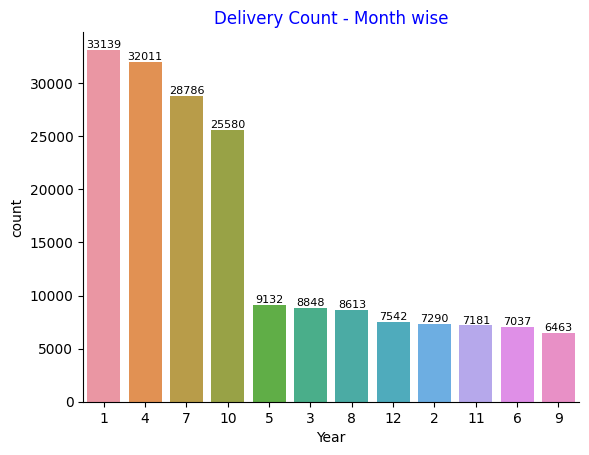

In [142]:
year_deli_date=sns.countplot(x=copper['delivery date'].dt.month,order=copper['delivery date'].dt.month.value_counts(ascending=False).index)
year_deli_date.bar_label(year_deli_date.containers[0],fontsize=8)
plt.title('Delivery Count - Month wise',color='blue')
plt.xlabel('Year')
sns.despine()

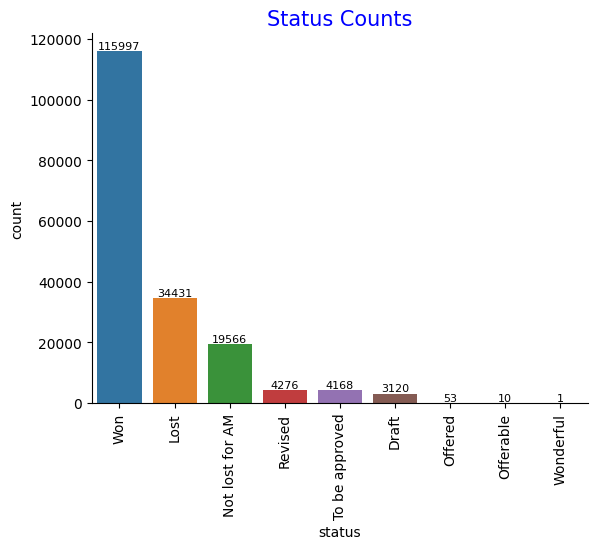

In [143]:
status=sns.countplot(x=copper['status'],order=copper['status'].value_counts(ascending=False).index)
status.bar_label(status.containers[0],fontsize=8)
plt.xticks(rotation=90)
plt.title('Status Counts',fontsize=15,color='blue')
sns.despine()

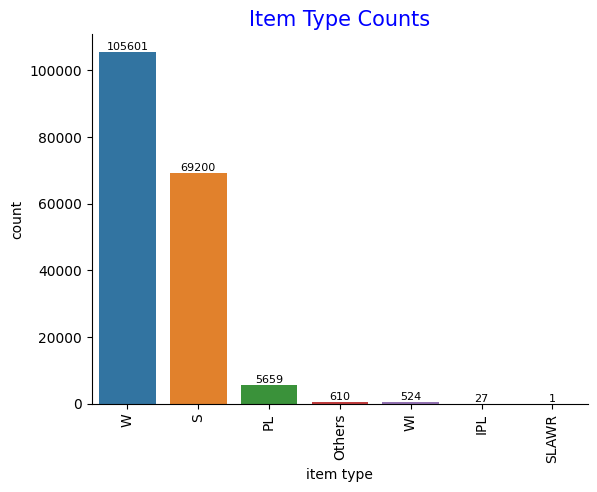

In [144]:
item_type=sns.countplot(x=copper['item type'],order=copper['item type'].value_counts(ascending=False).index)
item_type.bar_label(item_type.containers[0],fontsize=8)
plt.xticks(rotation=90)
plt.title('Item Type Counts',fontsize=15,color='blue')
sns.despine()

In [145]:
copper.head()

,item_date,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,delivery date,selling_price
0,2021-04-01,54.15,30156308.0,28.0,Won,W,10.0,2.00,1500.0,1670798778,2021-07-01,854.00
1,2021-04-01,768.02,30202938.0,25.0,Won,W,41.0,0.80,1210.0,1668701718,2021-04-01,1047.00
2,2021-04-01,386.13,30153963.0,30.0,Won,WI,28.0,0.38,952.0,628377,2021-01-01,644.33
3,2021-04-01,202.41,30349574.0,32.0,Won,S,59.0,2.30,1317.0,1668701718,2021-01-01,768.00
4,2021-04-01,785.53,30211560.0,28.0,Won,W,10.0,4.00,2000.0,640665,2021-03-01,577.00


In [146]:
copper.nunique()

item_date          250
quantity tons    28556
customer          1167
country             17
status               9
item type            7
application         30
thickness          593
width             1386
product_ref         33
delivery date       26
selling_price     9789
dtype: int64

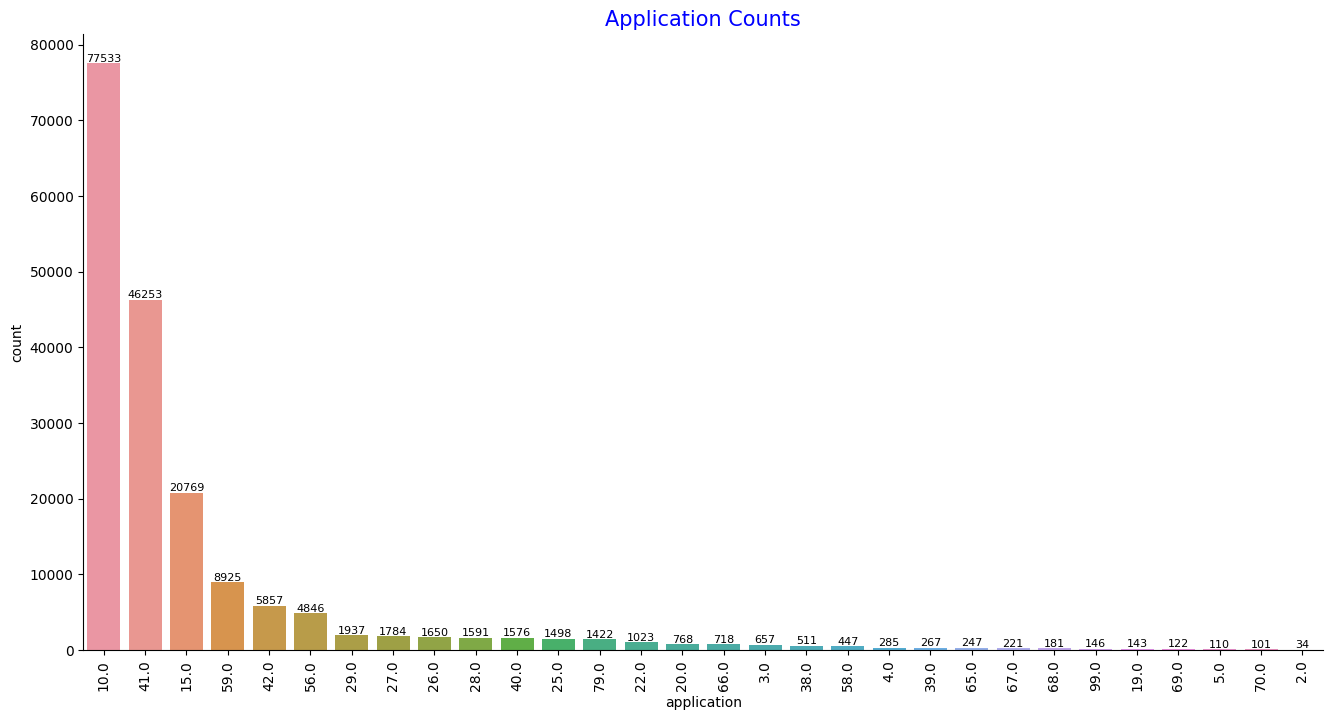

In [147]:
plt.figure(figsize=(16,8))
app=sns.countplot(x=copper['application'],order=copper['application'].value_counts(ascending=False).index)
app.bar_label(app.containers[0],fontsize=8)
plt.xticks(rotation=90)
plt.title('Application Counts',fontsize=15,color='blue')
sns.despine()

In [148]:
copper['volume']=copper['thickness']*copper['width']

In [150]:
copper['volume'].nunique()

10371

In [161]:
copper.rename(columns={'volume':'CrSArea'},inplace=True)

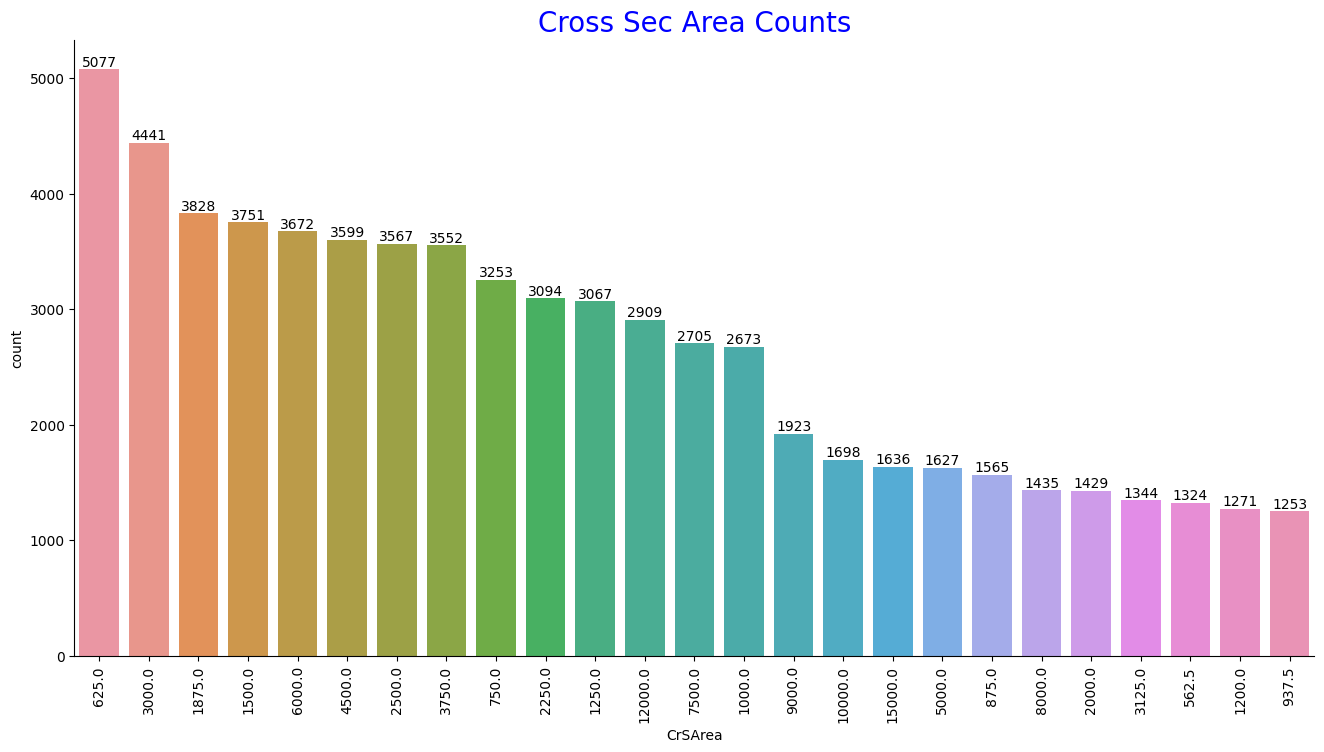

In [163]:
plt.figure(figsize=(16,8))
vol=sns.countplot(x=copper['CrSArea'],order=copper['CrSArea'].value_counts(ascending=False).index[:25])
vol.bar_label(vol.containers[0],fontsize=10)
plt.title('Cross Sec Area Counts',fontsize=20,color='blue')
plt.xticks(rotation=90)
sns.despine()

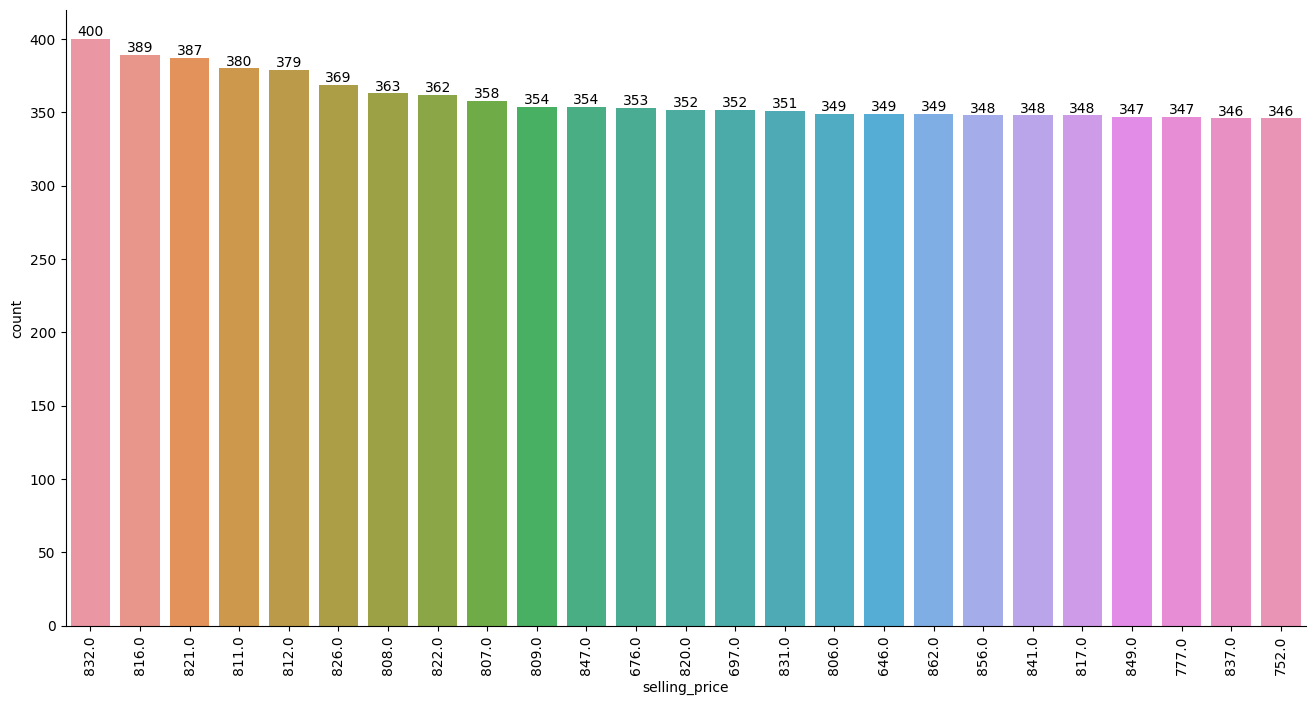

In [149]:
plt.figure(figsize=(16,8))
sp=sns.countplot(x=copper['selling_price'],order=copper['selling_price'].value_counts(ascending=False).index[:25])
sp.bar_label(sp.containers[0],fontsize=10)
plt.xticks(rotation=90)
sns.despine()

In [164]:
copper.head(2)

,item_date,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,delivery date,selling_price,CrSArea
0,2021-04-01,54.15,30156308.0,28.0,Won,W,10.0,2.0,1500.0,1670798778,2021-07-01,854.0,3000.0
1,2021-04-01,768.02,30202938.0,25.0,Won,W,41.0,0.8,1210.0,1668701718,2021-04-01,1047.0,968.0


In [177]:
#dftn=tn.groupby(['Crop'])['Crop'].count().to_frame()
#dftn.rename(columns={'Crop':'CropCount'},inplace=True)
cust_group=copper.groupby(['customer'])['selling_price'].mean().sort_values(ascending =False).to_frame()

In [178]:
#cust_group.rename(columns={'selling_price':'SP'},inplace=True)

In [185]:
cust_group=cust_group.reset_index()

In [188]:
cust_group.describe()

,customer,SP
count,1.167000e+03,1.167000e+03
mean,3.024402e+07,1.809170e+04
std,8.890966e+05,5.854613e+05
min,1.245800e+04,1.200000e+01
25%,3.020309e+07,7.282295e+02
50%,3.027138e+07,8.258125e+02
75%,3.034147e+07,9.513048e+02
max,3.040818e+07,2.000071e+07


In [187]:
cust_group['customer']

0       30353306.0
1       30217607.0
2       30147848.0
3       30272666.0
4       30357385.0
           ...    
1162    30276619.0
1163    30398602.0
1164    30348439.0
1165    30218794.0
1166    30350537.0
Name: customer, Length: 1167, dtype: float64

<Axes: xlabel='customer', ylabel='SP'>

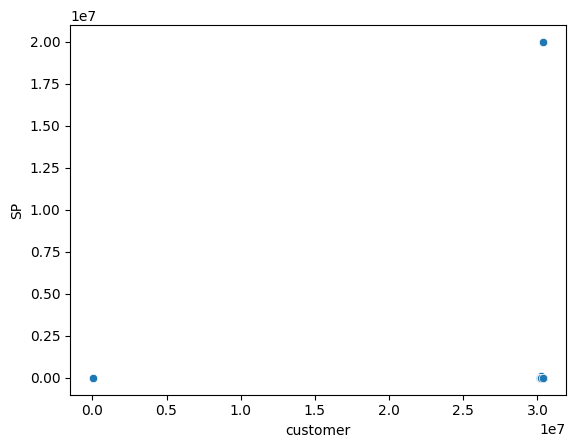

In [189]:
sns.scatterplot(x='customer',y='SP',data=cust_group)

In [190]:
copper.groupby(copper['item_date'].dt.year)['selling_price'].sum()

item_date
2020    8.097360e+07
2021    2.674638e+08
Name: selling_price, dtype: float64

In [191]:
copper.groupby(copper['delivery date'])['selling_price'].sum()

delivery date
2019-04-01    1.286380e+03
2019-07-01    2.489810e+03
2019-10-01    9.758100e+02
2020-01-01    8.303647e+04
2020-04-01    4.267502e+04
2020-05-01    8.522000e+03
2020-06-01    1.984000e+04
2020-07-01    5.504583e+06
2020-08-01    2.650572e+06
2020-09-01    3.610141e+06
2020-10-01    1.865056e+07
2020-11-01    4.775331e+06
2020-12-01    5.518043e+06
2021-01-01    1.255131e+08
2021-02-01    5.301030e+06
2021-03-01    7.110566e+06
2021-04-01    2.980980e+07
2021-05-01    1.081726e+08
2021-06-01    6.390519e+06
2021-07-01    2.086574e+07
2021-08-01    3.790153e+06
2021-09-01    3.556643e+05
2021-10-01    2.305640e+05
2021-11-01    2.557000e+03
2021-12-01    2.094200e+04
2022-01-01    6.040000e+03
Name: selling_price, dtype: float64

In [192]:
copper.columns

Index(['item_date', 'quantity tons', 'customer', 'country', 'status',
       'item type', 'application', 'thickness', 'width', 'product_ref',
       'delivery date', 'selling_price', 'CrSArea'],
      dtype='object')

<Axes: xlabel='quantity tons', ylabel='selling_price'>

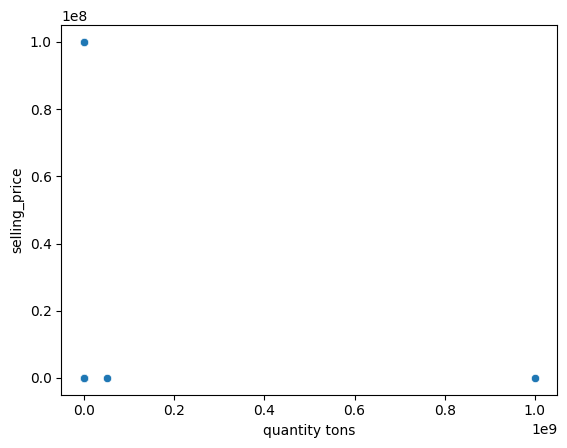

In [193]:
sns.scatterplot(x='quantity tons',y='selling_price',data=copper)

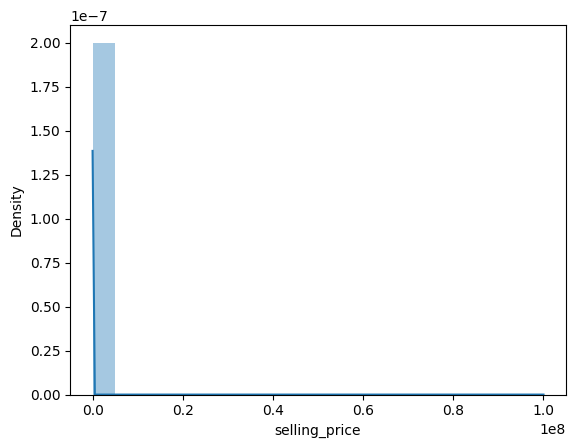

In [194]:
sns.distplot(copper['selling_price'],bins=20,hist=True,kde=True)
plt.show()

In [227]:
cop1=copper.copy()

In [232]:
cop1

,item_date,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,delivery date,selling_price,CrSArea
0,2021-04-01,54.15,30156308.0,28.0,Won,W,10.0,2.00,1500.0,1670798778,2021-07-01,854.00,3000.00
1,2021-04-01,768.02,30202938.0,25.0,Won,W,41.0,0.80,1210.0,1668701718,2021-04-01,1047.00,968.00
2,2021-04-01,386.13,30153963.0,30.0,Won,WI,28.0,0.38,952.0,628377,2021-01-01,644.33,361.76
3,2021-04-01,202.41,30349574.0,32.0,Won,S,59.0,2.30,1317.0,1668701718,2021-01-01,768.00,3029.10
4,2021-04-01,785.53,30211560.0,28.0,Won,W,10.0,4.00,2000.0,640665,2021-03-01,577.00,8000.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
181667,2020-07-02,106.78,30200854.0,25.0,Won,W,41.0,0.96,1240.0,164141591,2020-07-01,602.00,1190.40
181668,2020-07-02,102.48,30200854.0,25.0,Won,W,41.0,0.96,1220.0,164141591,2020-07-01,591.00,1171.20
181669,2020-07-02,208.09,30200854.0,25.0,Won,W,41.0,0.95,1500.0,164141591,2020-07-01,589.00,1425.00
181670,2020-07-02,4.24,30200854.0,25.0,Won,W,41.0,0.71,1250.0,164141591,2020-07-01,619.00,887.50


In [240]:
cop1['selling_price'].skew()

301.3457813386571

In [239]:
spsq=np.sqrt(cop1['selling_price'])
spsq.skew()

292.34275851376947

In [238]:
splog=np.log(cop1['selling_price'])
splog.skew()

-5.342786681271056

In [248]:
from scipy import stats

z = np.abs(stats.zscore(cop1['selling_price']))
cop1 = cop1[(z < 3)]
cop1['selling_price'].skew()

-0.25729462423986615

In [250]:
cop1

,item_date,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,delivery date,selling_price,CrSArea
0,2021-04-01,54.15,30156308.0,28.0,Won,W,10.0,2.00,1500.0,1670798778,2021-07-01,854.00,3000.00
1,2021-04-01,768.02,30202938.0,25.0,Won,W,41.0,0.80,1210.0,1668701718,2021-04-01,1047.00,968.00
2,2021-04-01,386.13,30153963.0,30.0,Won,WI,28.0,0.38,952.0,628377,2021-01-01,644.33,361.76
3,2021-04-01,202.41,30349574.0,32.0,Won,S,59.0,2.30,1317.0,1668701718,2021-01-01,768.00,3029.10
4,2021-04-01,785.53,30211560.0,28.0,Won,W,10.0,4.00,2000.0,640665,2021-03-01,577.00,8000.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
181667,2020-07-02,106.78,30200854.0,25.0,Won,W,41.0,0.96,1240.0,164141591,2020-07-01,602.00,1190.40
181668,2020-07-02,102.48,30200854.0,25.0,Won,W,41.0,0.96,1220.0,164141591,2020-07-01,591.00,1171.20
181669,2020-07-02,208.09,30200854.0,25.0,Won,W,41.0,0.95,1500.0,164141591,2020-07-01,589.00,1425.00
181670,2020-07-02,4.24,30200854.0,25.0,Won,W,41.0,0.71,1250.0,164141591,2020-07-01,619.00,887.50


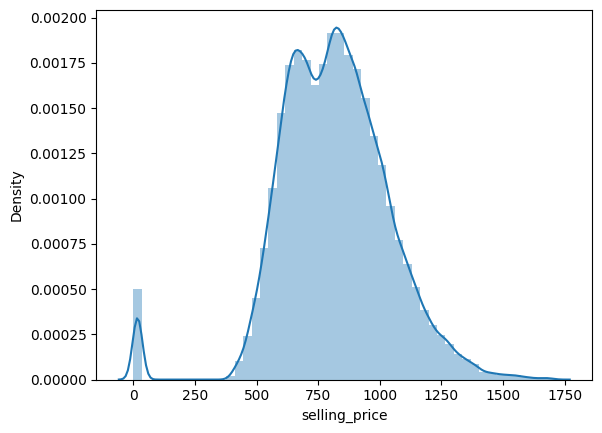

In [249]:
sns.distplot(cop1['selling_price'],bins=None,hist=True,kde=True)
plt.show()

In [251]:
cop1['selling_price'].skew()

-0.25729462423986615

In [254]:
tonssqrt=np.sqrt(cop1['quantity tons'])
tonssqrt.skew()

395.78200865614735

In [253]:
cop1['quantity tons'].skew()

424.4300866301591

In [255]:
x = np.abs(stats.zscore(cop1['quantity tons']))
cop1 = cop1[(x < 3)]

In [256]:
cop1['quantity tons'].skew()

49.77281403259187

In [257]:
qtylog=np.log(cop1['quantity tons'])
qtylog.skew()

nan

In [258]:
qtysq=np.sqrt(cop1['quantity tons'])
qtysq.skew()

5.321208208475055

In [259]:
qtycb=np.cbrt(cop1['quantity tons'])
qtycb.skew()

2.567663825912009

In [261]:
qty4th=np.power(cop1['quantity tons'],1/4)
qty4th.skew()

1.7245049654612057

In [262]:
qty5th=np.power(cop1['quantity tons'],1/5)
qty5th.skew()

1.3068169226956834

In [265]:
qty8th=np.power(cop1['quantity tons'],1/8)
qty8th.skew()

0.7539325392978908

In [266]:
qty8th

0         1.647024
1         2.294413
2         2.105434
3         1.942133
4         2.300887
            ...   
181667    1.792921
181668    1.783733
181669    1.948863
181670    1.197900
181672    2.119132
Name: quantity tons, Length: 181448, dtype: float64

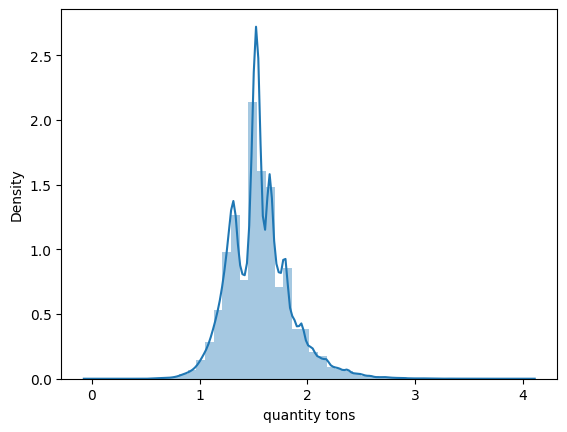

In [267]:
sns.distplot(qty8th,bins=None,hist=True,kde=True)
plt.show()

In [274]:
cop1['quantity tons']=np.power(cop1['quantity tons'],1/8)
cop1['quantity tons'].skew()

0.7539325392978908

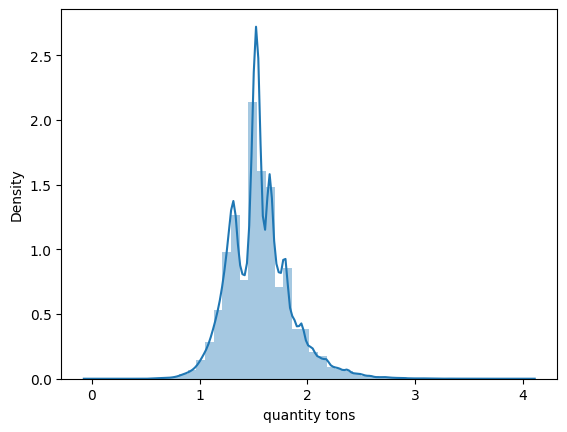

In [275]:
sns.distplot(cop1['quantity tons'],bins=None,hist=True,kde=True)
plt.show()

<Axes: xlabel='selling_price', ylabel='quantity tons'>

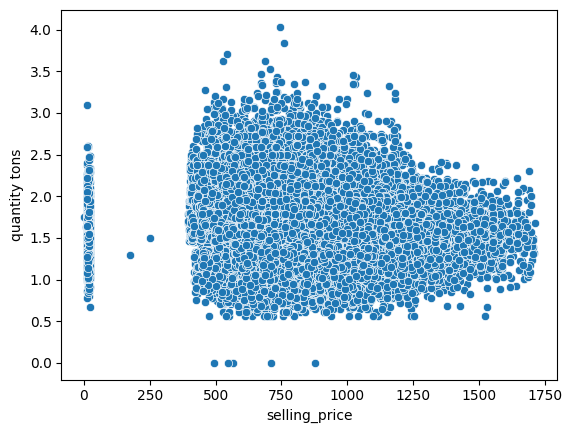

In [279]:
sns.scatterplot(y='quantity tons',x='selling_price',data=cop1)

<Axes: >

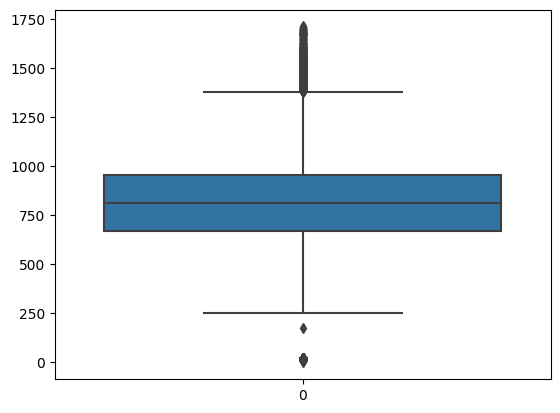

In [270]:
sns.boxplot(cop1['selling_price'])

<Axes: >

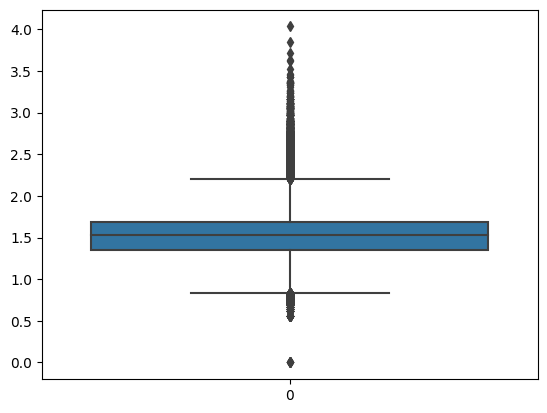

In [276]:
sns.boxplot(cop1['quantity tons'])

<Axes: >

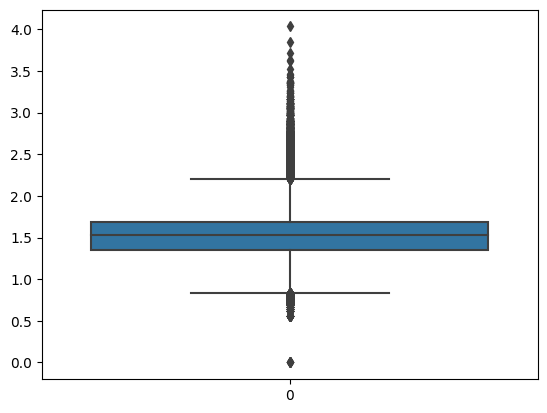

In [272]:
sns.boxplot(qty8th)

In [278]:
cop1.reset_index()

,index,item_date,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,delivery date,selling_price,CrSArea
0,0,2021-04-01,1.647024,30156308.0,28.0,Won,W,10.0,2.00,1500.0,1670798778,2021-07-01,854.00,3000.00
1,1,2021-04-01,2.294413,30202938.0,25.0,Won,W,41.0,0.80,1210.0,1668701718,2021-04-01,1047.00,968.00
2,2,2021-04-01,2.105434,30153963.0,30.0,Won,WI,28.0,0.38,952.0,628377,2021-01-01,644.33,361.76
3,3,2021-04-01,1.942133,30349574.0,32.0,Won,S,59.0,2.30,1317.0,1668701718,2021-01-01,768.00,3029.10
4,4,2021-04-01,2.300887,30211560.0,28.0,Won,W,10.0,4.00,2000.0,640665,2021-03-01,577.00,8000.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181443,181667,2020-07-02,1.792921,30200854.0,25.0,Won,W,41.0,0.96,1240.0,164141591,2020-07-01,602.00,1190.40
181444,181668,2020-07-02,1.783733,30200854.0,25.0,Won,W,41.0,0.96,1220.0,164141591,2020-07-01,591.00,1171.20
181445,181669,2020-07-02,1.948863,30200854.0,25.0,Won,W,41.0,0.95,1500.0,164141591,2020-07-01,589.00,1425.00
181446,181670,2020-07-02,1.197900,30200854.0,25.0,Won,W,41.0,0.71,1250.0,164141591,2020-07-01,619.00,887.50


<Axes: xlabel='selling_price', ylabel='CrSArea'>

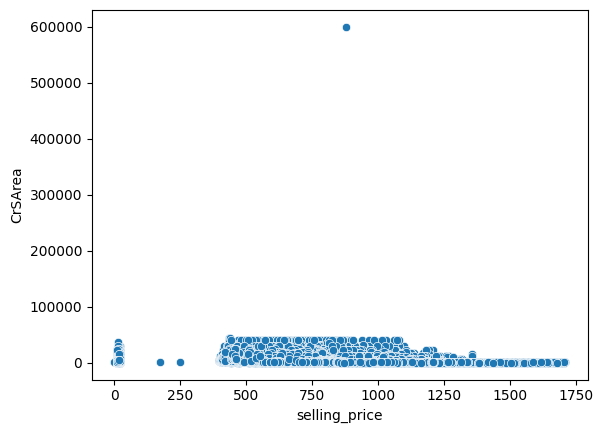

In [281]:
sns.scatterplot(x='selling_price',y='CrSArea',data=cop1)

<Axes: >

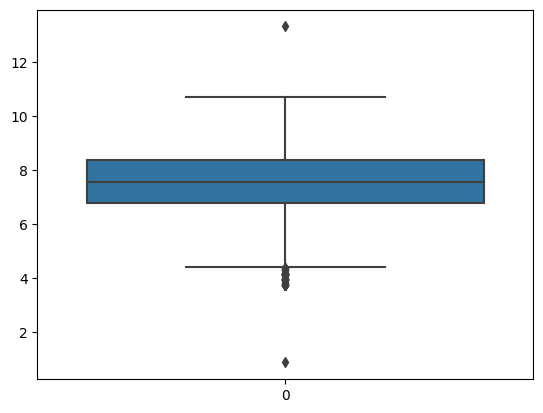

In [288]:
sns.boxplot(np.log(cop1['CrSArea']))

In [284]:
cop1['CrSArea'].skew()

13.256465267006758

In [289]:
cop1['CrSArea']=np.log(cop1['CrSArea'])
cop1['CrSArea'].skew()

0.39473568123078867

In [286]:
crsasqrt=np.sqrt(cop1['CrSArea'])
crsasqrt.skew()

1.5567667840801234

In [293]:
np.log(cop1.thickness).skew()

0.35181277494609253

In [295]:
cop1.width.skew()

0.40376698234461544

Axes(0.125,0.11;0.775x0.77)


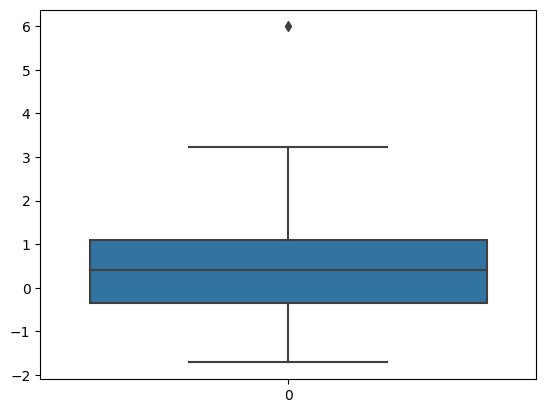

In [301]:
sns.boxplot(np.log(cop1['thickness']))


<Axes: >

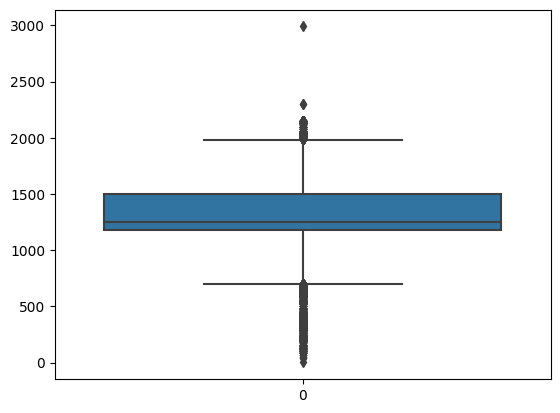

In [303]:
sns.boxplot(cop1['width'])

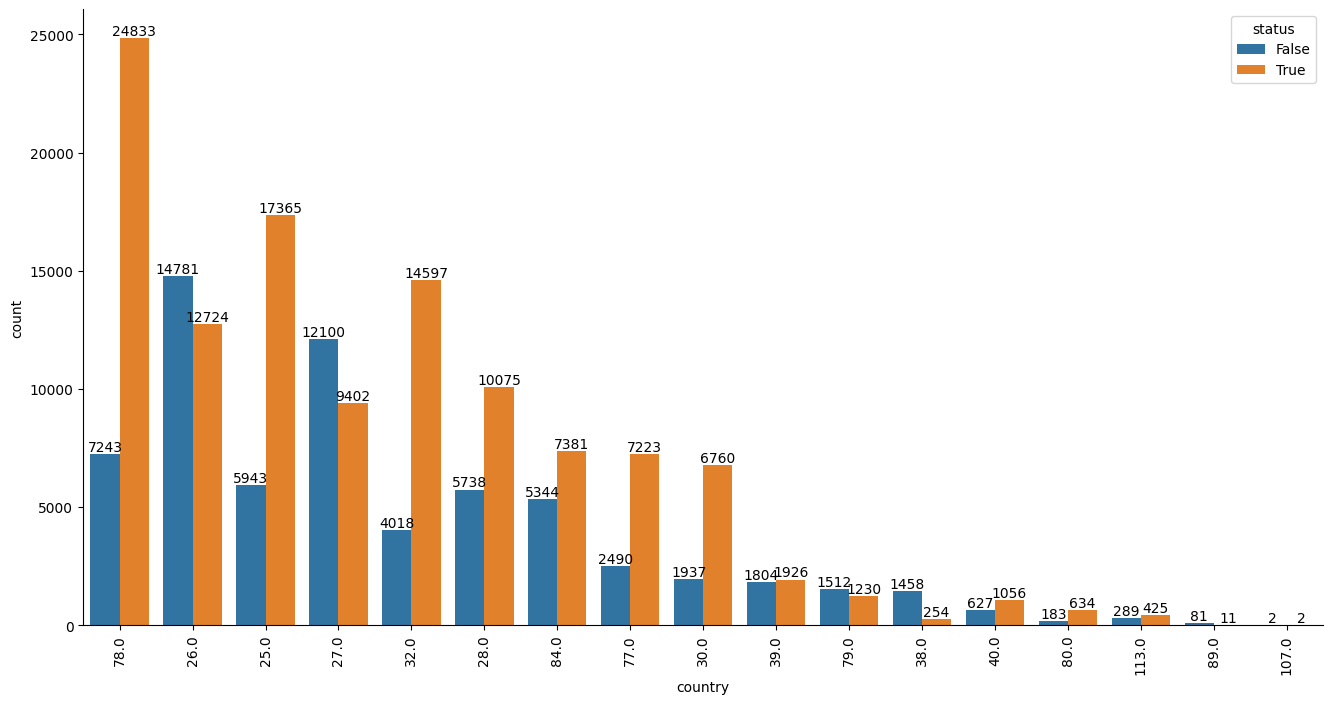

In [357]:
#sns.boxplot(x='rate',y='location',data=df,order=df['location'].value_counts(ascending=False).index[:10])
#sns.boxplot(x='online_order',y='rate',data=df)
plt.figure(figsize=(16,8))
ContStat=sns.countplot(x=cop1['country'],hue=(cop1['status']=='Won'),order=cop1['country'].value_counts(ascending=False).index)
#ContStat.bar_label(ContStat.containers[0])
for cont in ContStat.containers:
    ContStat.bar_label(cont)
plt.xticks(rotation=90)
sns.despine()

In [371]:
cop1.head(1)

,item_date,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,delivery date,selling_price,CrSArea
0,2021-04-01,1.647024,30156308.0,28.0,Won,W,10.0,2.0,1500.0,1670798778,2021-07-01,854.0,8.006368


In [372]:
cop1.columns

Index(['item_date', 'quantity tons', 'customer', 'country', 'status',
       'item type', 'application', 'thickness', 'width', 'product_ref',
       'delivery date', 'selling_price', 'CrSArea'],
      dtype='object')

In [386]:
heatmap=cop1[['quantity tons', 'customer', 'country', 'application', 'thickness', 'width', 'product_ref',
                  'selling_price','CrSArea']].corr()
target=heatmap['selling_price']
target


quantity tons   -0.033343
customer         0.000924
country         -0.024746
application      0.116936
thickness       -0.263968
width           -0.155056
product_ref     -0.069006
selling_price    1.000000
CrSArea         -0.387898
Name: selling_price, dtype: float64

<Axes: >

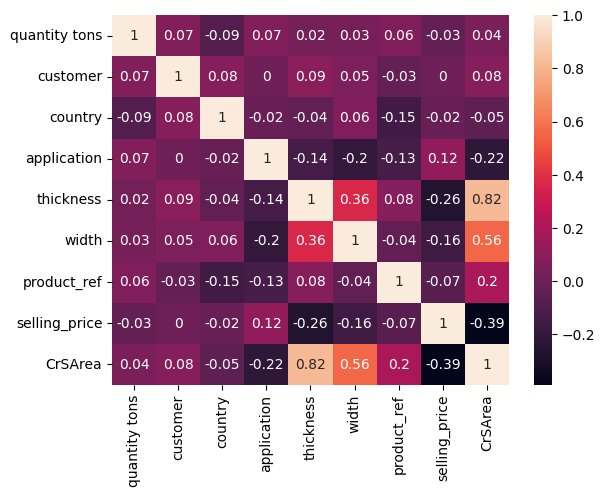

In [380]:
sns.heatmap(heatmap.round(2), annot=True)